# Draw Graph

This script takes input of representation layer (numpy array) and plot 2-D graph for visualization. Two approaches are provided: PCA and SVD. We only provide one sample graph here, but it can be generalized by just changing the input file.

In [1]:
# Import libraries
from __future__ import print_function
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.nn.functional import sigmoid, relu
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!ls "/content/drive/My Drive/1016 Cognition Project/"
path = "/content/drive/My Drive/1016 Cognition Project/"

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

### Input item names, plot with PCA and SVD

In [15]:
with open(path+'sem_items_animal_only.txt','r') as fid:
    names_items_animal = np.array([l.strip() for l in fid.readlines()])

rep_animal = np.load(path+'rep_array_animal_orig.npy')

In [16]:
# Center the data
centered_rep_animal = rep_animal - np.mean(rep_animal, axis=0)

# Scale the data
scaler = StandardScaler()
scaled_rep_animal = scaler.fit_transform(centered_rep_animal)
#scaled_rep_animal

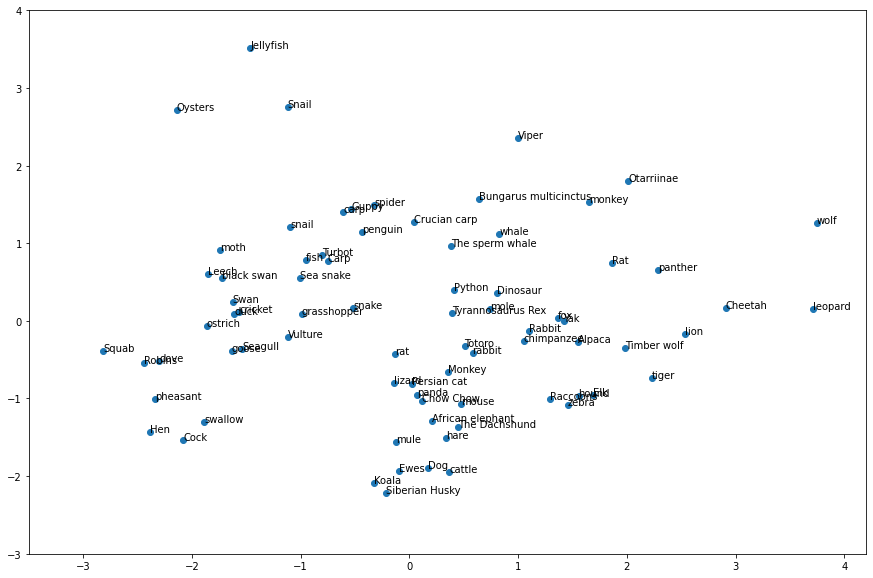

In [17]:
pca = PCA(n_components = 2)
reduced = pca.fit_transform(scaled_rep_animal)
t = reduced.transpose()

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(t[0], t[1])
plt.xlim(-3.5,4.2)
plt.ylim(-3,4)

# Add the labels
for i, name in enumerate(names_items_animal):
    ax.annotate(name, (t[0,i], t[1,i]))

plt.show()

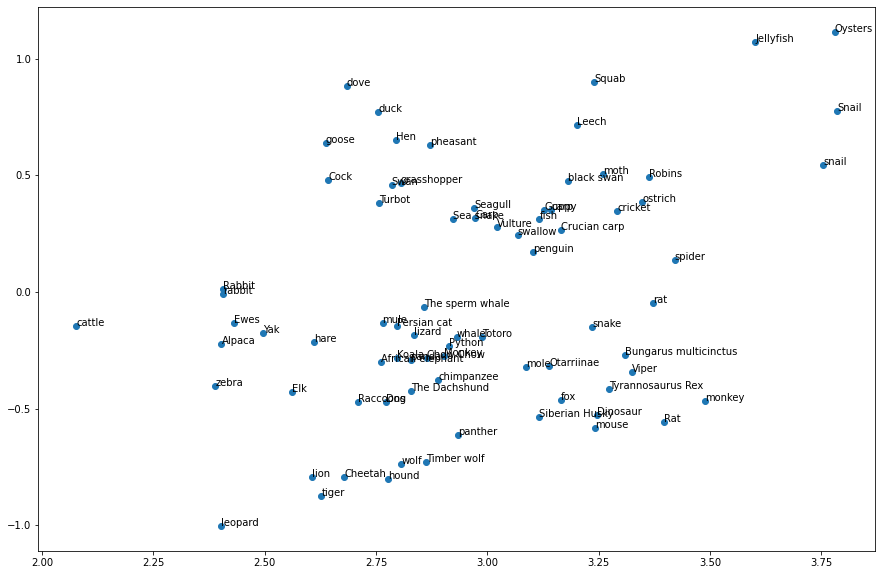

In [ ]:
svd = TruncatedSVD(n_components=2)
reduced = svd.fit_transform(rep_animal)
t = reduced.transpose()

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(t[0], t[1])

# Add the labels
for i, name in enumerate(names_items_animal):
    ax.annotate(name, (t[0,i], t[1,i]))

plt.show()